___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

Finally, you should clustered customers using the ***K-Means Clustering*** or other clustering methods, after that label the clusters.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study#### 

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

#### Import Libraries

In [65]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

import warnings
warnings.filterwarnings("ignore")

#### Load Dataset

In [66]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Explore Data

You can rename columns to more usable, if you need.

In [67]:
df.rename(columns = {"Annual Income (k$)" : "Annual_Income", "Spending Score (1-100)" : "Spending_Score"}, inplace=True)
df

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [68]:
df.columns = df.columns.str.lower()

In [69]:
df.columns

Index(['customerid', 'gender', 'age', 'annual_income', 'spending_score'], dtype='object')

---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [70]:
df.head()

,customerid,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customerid      200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [72]:
df.describe()

,customerid,age,annual_income,spending_score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


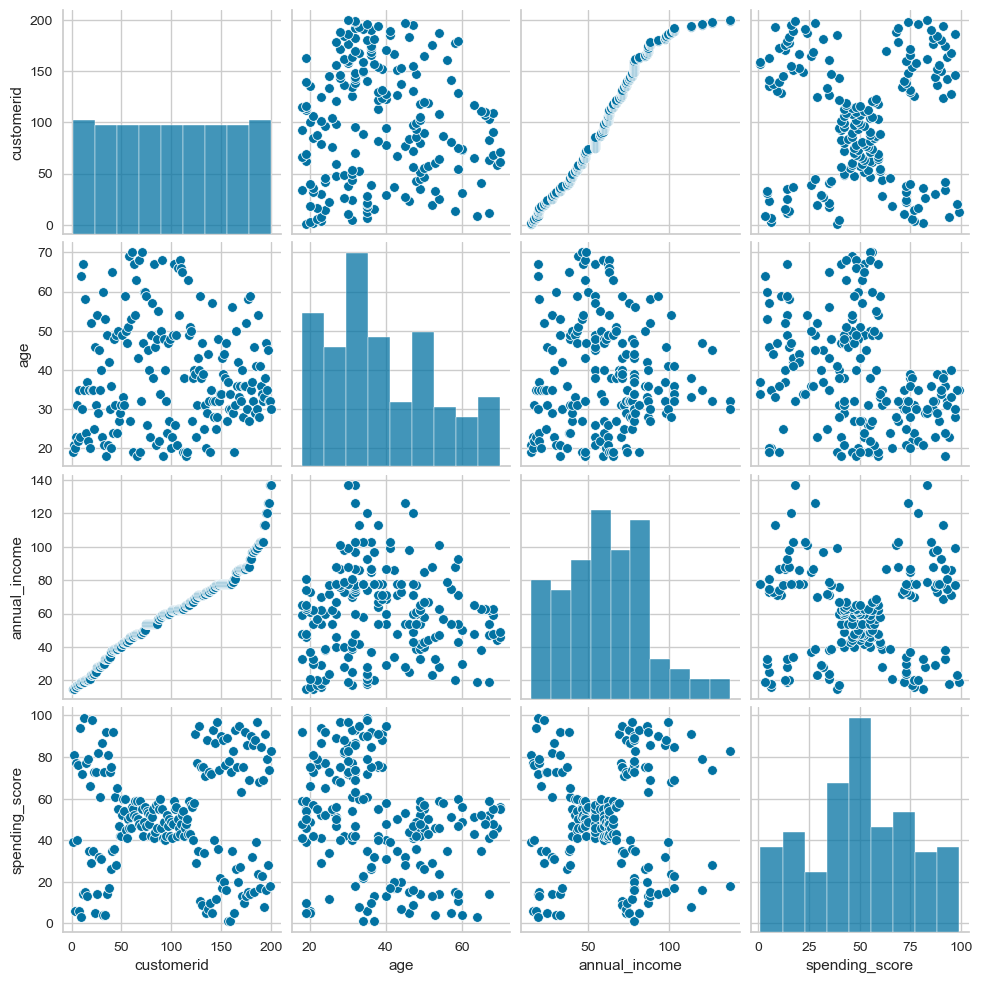

In [73]:
sns.pairplot(df)
plt.show()

In [74]:
df.drop(columns="customerid", inplace=True)

In [75]:
df.isnull().sum()

gender            0
age               0
annual_income     0
spending_score    0
dtype: int64

In [76]:
df.duplicated().sum()

0

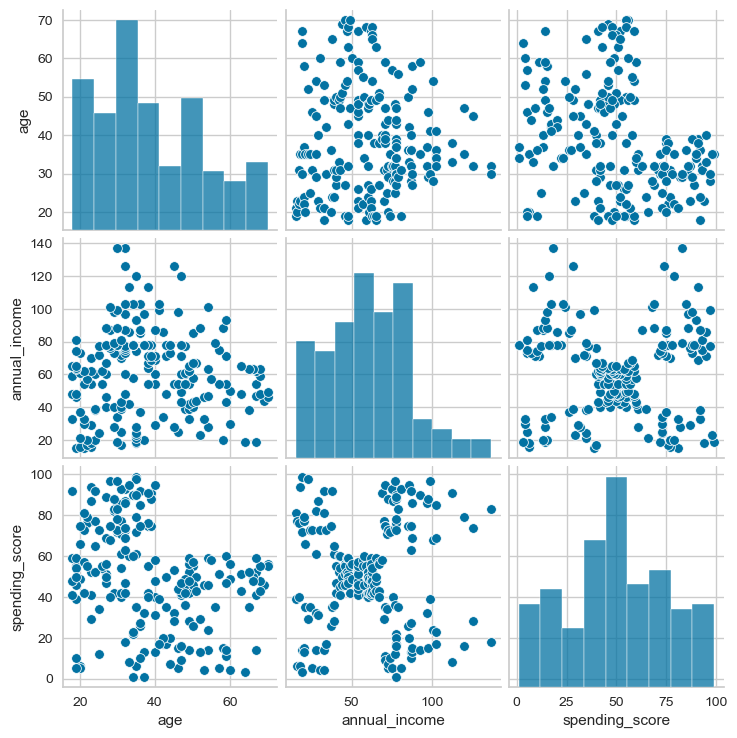

In [77]:
sns.pairplot(df)
plt.show()

---
---

## 3. Cluster Analysis

The main purpose of this project is to perform [cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis#:~:text=Cluster%20analysis%20or%20clustering%20is,in%20other%20groups%20(clusters).) with the [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) algorithm. 

You can perform many [cluster analysis](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) using different variables. If you use a maximum of two variables for each cluster analysis, you can identify cluster labels more clearly.

First, the K-Means algorithm expects you to determine the number of clusters (*n_clusters*). You can determine the optimal number of clusters for each cluster analysis in various ways. In this case, you are expected to use the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).

Finally, different information is obtained in each analysis. Therefore, different labeling should be done as a result of each cluster analysis. 

Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

Bu projenin ana amacı [kümeleme analizi](https://en.wikipedia.org/wiki/Cluster_analysis#:~:text=Cluster%20analysis%20or%20clustering%20is,in%20other%20groups%20 gerçekleştirmektir. (kümeler)).

Farklı değişkenler kullanarak birçok [küme analizi](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) gerçekleştirebilirsiniz. Her bir küme analizi için en fazla iki değişken kullanırsanız, küme etiketlerini daha net bir şekilde tanımlayabilirsiniz.

İlk olarak, K-Means algoritması sizden küme sayısını (*n_clusters*) belirlemenizi bekler. Her küme analizi için en uygun küme sayısını çeşitli şekillerde belirleyebilirsiniz. Bu durumda, [Dirsek Yöntemini](https://en.wikipedia.org/wiki/Elbow_method_(kümeleme) kullanmanız beklenir.

Son olarak, her analizde farklı bilgiler elde edilir. Bu nedenle her küme analizi sonucunda farklı etiketleme yapılmalıdır.

Etiketleme örneği:

- **Normal Müşteriler** -- Harcama ve Yıllık Gelir açısından Ortalama bir tüketici
- **Harcayan Müşteriler** -- Yıllık Gelir daha az ancak harcaması yüksek, dolayısıyla potansiyel hedef müşteri olarak da değerlendirilebilir.

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [78]:
X = df.loc[:, ["age", "spending_score"]]
X.head()

,age,spending_score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


#### *ii. Determine optimal number of clusters*

In [79]:
from sklearn.cluster import KMeans

In [80]:
ssd = []
K = range(2,10)
for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X)
    ssd.append(model.inertia_)

In [81]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [82]:
plt.plot(K, ssd, "bo--")   # yukarıdaki verilere istinaden şemayı çiziyoruz
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 

Text(0.5, 1.0, 'elbow method')

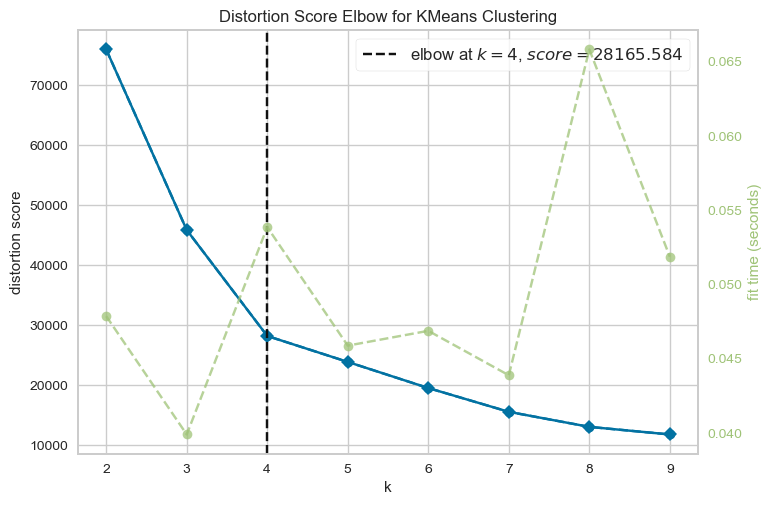

In [83]:
model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k = K)

visualizer.fit(X)
visualizer.show();

In [84]:
from sklearn.metrics import silhouette_score

In [85]:
range_n_clusters = range(2,10)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, 
                    random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {round(silhouette_avg, 3)}")

For n_clusters=2, the silhouette score is 0.469
For n_clusters=3, the silhouette score is 0.453
For n_clusters=4, the silhouette score is 0.5
For n_clusters=5, the silhouette score is 0.434
For n_clusters=6, the silhouette score is 0.438
For n_clusters=7, the silhouette score is 0.423
For n_clusters=8, the silhouette score is 0.432
For n_clusters=9, the silhouette score is 0.415


### Why silhouette_score is negative?

![image.png](attachment:image.png)

#### *iii. Apply K Means*

In [86]:
from sklearn.cluster import KMeans

K_means_model = KMeans(n_clusters=4, 
                       random_state=42)

In [87]:
K_means_model.fit(X)
# fit -------------> algoritma patterneleri tespit ediyor burada (4 cluster olacak şekilde)

KMeans(n_clusters=4, random_state=42)

In [88]:
K_means_model.predict(X)

array([3, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 3, 1, 2, 3, 2,
       1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 3,
       1, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 2, 3, 2, 0, 2, 1, 2, 1, 2,
       3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [89]:
K_means_model.labels_
# fit yaptıktan sonra doğrudan .labels_ ile de hangi gözlem hangi cluster'a atanmış görebiliriz.

array([3, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 3, 1, 2, 3, 2,
       1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 3,
       1, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 2, 3, 2, 0, 2, 1, 2, 1, 2,
       3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

#### *iv. Visualizing and Labeling All the Clusters*

In [90]:
clusters = model.labels_

In [91]:
X["predicted_clusters"] = clusters

In [92]:
X.head(3)

,age,spending_score,predicted_clusters
0,19,39,5
1,21,81,2
2,20,6,1


In [93]:
X["predicted_clusters"].value_counts()

2    36
4    28
3    28
5    24
0    22
7    20
8    19
1    12
6    11
Name: predicted_clusters, dtype: int64

In [94]:
X["predicted_clusters"]=clusters

In [95]:
X.head()

,age,spending_score,predicted_clusters
0,19,39,5
1,21,81,2
2,20,6,1
3,23,77,2
4,31,40,7


In [96]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
sns.boxplot(data=X, x="predicted_clusters", y = "age")

plt.subplot(1,2,2)
sns.boxplot(data=X, x="predicted_clusters", y = "age");

In [97]:
sns.scatterplot(x = "age", y = "spending_score", hue="predicted_clusters", data = X, palette="bright")
centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = "black", s = 300, alpha = 0.5);

In [98]:
plt.figure(figsize = (20,6))

plt.subplot(141)
sns.boxplot(y = "age", x = "predicted_clusters", data = X)
sns.stripplot(y = "age", x = "predicted_clusters", data = X, palette="dark")
#striplot ile cluster'larımızın yoğun olduğu ve seyrek olduğu yerleri görebiliyoruz.

plt.subplot(142)
sns.boxplot(y = "spending_score", x = "predicted_clusters", data = X)
sns.stripplot(y = "spending_score", x = "predicted_clusters", data = X, palette="dark")

<AxesSubplot:xlabel='predicted_clusters', ylabel='spending_score'>

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [99]:
X1 = df.loc[:, ["annual_income", "spending_score"]]
X1.head()

,annual_income,spending_score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


#### *ii. Determine optimal number of clusters*

In [100]:
from sklearn.cluster import KMeans

In [102]:
ssd = []
K = range(2,10)
for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X1)
    ssd.append(model.inertia_)

In [103]:
plt.plot(K, ssd, "bo--")   # yukarıdaki verilere istinaden şemayı çiziyoruz
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 

Text(0.5, 1.0, 'elbow method')

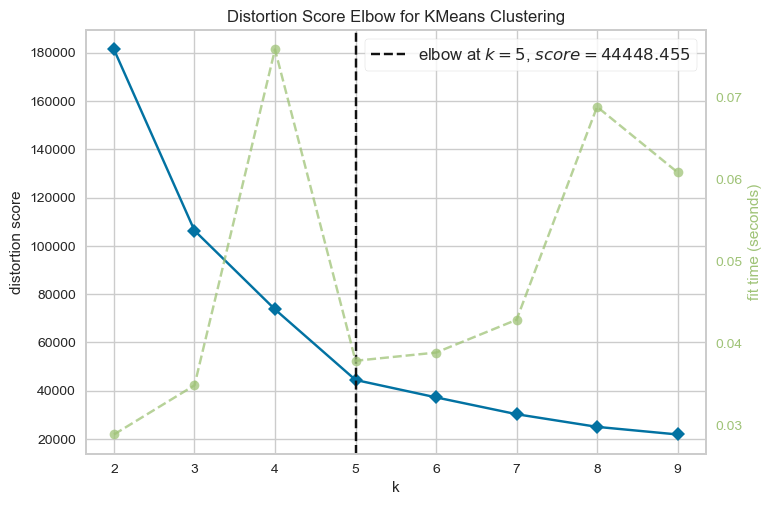

In [105]:
model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k = K)

visualizer.fit(X1)
visualizer.show();

In [107]:
range_n_clusters = range(2,10)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, 
                    random_state=42)
    kmeans.fit(X1)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X1, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {round(silhouette_avg, 3)}")

For n_clusters=2, the silhouette score is 0.297
For n_clusters=3, the silhouette score is 0.468
For n_clusters=4, the silhouette score is 0.493
For n_clusters=5, the silhouette score is 0.554
For n_clusters=6, the silhouette score is 0.54
For n_clusters=7, the silhouette score is 0.526
For n_clusters=8, the silhouette score is 0.458
For n_clusters=9, the silhouette score is 0.455


#### *iii. Apply K Means*

In [108]:
K1_means_model_ = KMeans(n_clusters=5, 
                       random_state=42)

In [109]:
K_means_model.fit(X1)
# fit -------------> algoritma patterneleri tespit ediyor burada (5 cluster olacak şekilde)

KMeans(n_clusters=4, random_state=42)

In [110]:
K_means_model.predict(X1)

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [111]:
K_means_model.labels_
# fit yaptıktan sonra doğrudan .labels_ ile de hangi gözlem hangi cluster'a atanmış görebiliriz.

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

#### *iv. Visualizing and Labeling All the Clusters*

In [112]:
clusters = model.labels_

In [113]:
X1["predicted_clusters"] = clusters

In [114]:
X1.head()

,annual_income,spending_score,predicted_clusters
0,15,39,4
1,15,81,5
2,16,6,2
3,16,77,5
4,17,40,4


In [115]:
X1["predicted_clusters"].value_counts()

6    42
0    40
7    28
1    23
5    21
4    13
2    12
3    11
8    10
Name: predicted_clusters, dtype: int64

In [116]:
X1["predicted_clusters"]=clusters

In [117]:
X1.head()

,annual_income,spending_score,predicted_clusters
0,15,39,4
1,15,81,5
2,16,6,2
3,16,77,5
4,17,40,4


In [118]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
sns.boxplot(data=X1, x="predicted_clusters", y = "spending_score")

plt.subplot(1,2,2)
sns.boxplot(data=X1, x="predicted_clusters", y = "annual_income");

In [119]:
sns.scatterplot(x = "annual_income", y = "spending_score", hue="predicted_clusters", data = X1, palette="bright")
centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = "black", s = 300, alpha = 0.5);

In [120]:
plt.figure(figsize = (20,6))

plt.subplot(141)
sns.boxplot(y = "annual_income", x = "predicted_clusters", data = X1)
sns.stripplot(y = "annual_income", x = "predicted_clusters", data = X1, palette="dark")
#striplot ile cluster'larımızın yoğun olduğu ve seyrek olduğu yerleri görebiliyoruz.

plt.subplot(142)
sns.boxplot(y = "spending_score", x = "predicted_clusters", data = X1)
sns.stripplot(y = "spending_score", x = "predicted_clusters", data = X1, palette="dark")

<AxesSubplot:xlabel='predicted_clusters', ylabel='spending_score'>

### Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

### Clustering based on Age and Spending Score- x1

In [135]:
X2 = df.loc[:, ["age", "spending_score"]]
X2.head()

,age,spending_score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


In [136]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [137]:
hc_ward = linkage(y = X2, method = "ward")
hc_complete = linkage(X2, "complete") 
hc_average = linkage(X2, "average")
hc_single = linkage(X2, "single")

In [138]:
plt.figure(figsize = (20,12))
hc_names = ["hc_ward", "hc_average", "hc_complete", "hc_single"]
hc_list = [hc_ward, hc_average, hc_complete, hc_single]
k = 1
for i in hc_list:
    plt.subplot(2,2,k)
    plt.title(hc_names[k-1])  
    plt.xlabel("Observations")
    plt.ylabel("Distance")
    dendrogram(i, leaf_font_size = 10, truncate_mode='lastp', p=10)
    k +=1

In [139]:
K = range(2,10)
for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit(X2)
    print(f"Num of Clusters : {k}, Score : {round(silhouette_score(X1, model.labels_), 3)}")

Num of Clusters : 2, Score : 0.378
Num of Clusters : 3, Score : 0.357
Num of Clusters : 4, Score : 0.113
Num of Clusters : 5, Score : 0.049
Num of Clusters : 6, Score : 0.015
Num of Clusters : 7, Score : -0.007
Num of Clusters : 8, Score : -0.021
Num of Clusters : 9, Score : -0.058


## Clustering based on Annual Income and Spending Score- x2

In [140]:
X3 = df.loc[:, ["annual_income", "spending_score"]]
X3.head()

,annual_income,spending_score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


### ii. *Apply Agglomerative Clustering*

#### Age and Spending Score- x1

In [141]:
hc_ward = linkage(y = X3, method = "ward")
hc_complete = linkage(X3, "complete") 
hc_average = linkage(X3, "average")
hc_single = linkage(X3, "single")

In [ ]:
plt.figure(figsize = (20,12))
hc_names = ["hc_ward", "hc_average", "hc_complete", "hc_single"]
hc_list = [hc_ward, hc_average, hc_complete, hc_single]
k = 1
for i in hc_list:
    plt.subplot(2,2,k)
    plt.title(hc_names[k-1])  
    plt.xlabel("Observations")
    plt.ylabel("Distance")
    dendrogram(i, leaf_font_size = 10, truncate_mode='lastp', p=10)
    k +=1

In [142]:
K = range(2,10)
for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit(X3)
    print(f"Num of Clusters : {k}, Score : {round(silhouette_score(X2, model.labels_), 3)}")

Num of Clusters : 2, Score : 0.126
Num of Clusters : 3, Score : 0.176
Num of Clusters : 4, Score : 0.172
Num of Clusters : 5, Score : 0.161
Num of Clusters : 6, Score : 0.103
Num of Clusters : 7, Score : 0.046
Num of Clusters : 8, Score : -0.044
Num of Clusters : 9, Score : -0.048


#### Annual Income and Spending Score- x2

### iii. *Visualizing and Labeling All the Clusters* 

#### Age and Spending Score- x1

In [143]:
model1 = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="ward")
model1.fit_predict(X1)

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int64)

#### Annual Income and Spending Score- x2

In [144]:
model2 = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="ward")
model2.fit_predict(X3)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

#### Interpretation based on Age and Spending Score- x1

In [145]:
clusters1 = model1.labels_

In [150]:
X["predicted_clusters"] = clusters1
X.head(3)

,age,spending_score,predicted_clusters
0,19,39,0
1,21,81,3
2,20,6,0


In [151]:
plt.scatter(X["age"], X1["spending_score"], c = clusters1, cmap = "viridis", alpha=0.7, s=100)
plt.xlabel("age")
plt.ylabel("Spending Score")
plt.title("Predicted Clusters");

### Conclusion

In [152]:
pd.concat([df, X1["predicted_clusters"]], axis=1).drop(columns="gender").groupby(["predicted_clusters"]).mean()

,age,annual_income,spending_score
predicted_clusters,,,
0,43.064815,49.527778,43.120370
1,41.000000,89.406250,15.593750
2,32.692308,86.538462,82.128205
3,25.333333,25.095238,80.047619


**cluster 0** : The average age is around 55, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

**cluster 1**: The average age is around 45, the annula_income is high but the spending_scores are very low. 
This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 2** :The average age is around 30. The annula_income is high and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.    
    
**cluster 3**: The average age is around 25.both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

#### Interpretation based on Annual Income and Spending Score- x2

In [154]:
clusters2 = model2.labels_

In [155]:
X1["predicted_clusters"] = clusters2
X1.head(3)

,annual_income,spending_score,predicted_clusters
0,15,39,4
1,15,81,3
2,16,6,4


In [156]:
plt.scatter(X1["annual_income"], X1["spending_score"], c = clusters2, cmap = "viridis", alpha=0.7, s=100)
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Predicted Clusters");

## Conclusion

### Female

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 45, the annula_income is very high but the spending_scores is low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

### Male

**cluster 0** : The average age is around 45, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 40, the annula_income is very high but the spending_scores is very low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 50. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 30, both annula_income and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 40, their annual income is very high but their spending_score
is very low. This group is our target audience and special strategies need to be developed for this 
group.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___